## Stats507 Homework 9, April 17, 2019
### Israel Diego
#### Discussed with: Hunter Zhang
#### israeldi@umich.edu

This notebook shows solutions to homework 9 for Stats507

## Table of Contents

1. [Problem 1: Implementing a Basic Data Structure](#Problem-1:-Implementing-a-Basic-Data-Structure)
2. [Problem 2: Comparing Sorting Algorithms](#Problem-2:-Comparing-Sorting-Algorithms)

### Problem 1: Implementing a Basic Data Structure
#### Time Spent: 
#### ([Back to Top](#Table-of-Contents))
In this problem you'll get a small taste of the kind of problem solving typical of software
engineering.
1. A *trie* (rhymes with *tree*, confusingly) is a tree-like data structure for storing collections of array-like data. We will confine our attention to strings for the sake of this problem, but bear in mind that tries can of course be used to represent much more general data than that. In a trie, each path from the root node to a leaf corresponds to a string in the collection, and every string in the collection has a corresponding path from the root to a node (not necessarily a leaf). Each edge from a node to one of its children is annotated with a letter, as in this example, which represents the collection of strings `{cat, car, cog, dart, do, dog}`.

<img src="https://raw.githubusercontent.com/israeldi/israeldi.github.io/master/Stats507/Homeworks/israeldi_hw9/trie_graph.png" alt="Drawing" style="width: 300px;"/>

Notice that only certain nodes in the trie are shaded. These correspond precisely to the nodes that represent strings in the collection. In passing, note that tries have certain advantages and disadvantages when compared against other look-up structures like hash tables. Refer to any textbook on data structures (or Wikipedia) for a discussion.

It should be more or less clear how one might represent this data structure as a Python dictionary, but let's walk through it. We will represent a trie by a series of nested dictionaries, with each node in the trie having a dictionary that maps a single character to another dictionary. Thus, for example, the trie in the figure above is, at its outer-most layer, a dictionary, say, `my_trie`, with two keys, `'c','d'`. `my_trie['c']` is itself a dictionary with two keys, `'a','o'` and `my_trie['d']` is a *separate dictionary* with the same two keys. (that is, `my_trie['c']` and `my_trie['d']` are equivalent, but they are not identical). Note that one tricky thing here is to make sure we have a system for representing which leaves (i.e., dictionaries) correspond to the ends of strings (i.e., shaded nodes in the figure above). To solve this, we will use the empty string (`''`) as a sort of special "end-of-word" character. Thus, for example, `my_trie['d']['o']` would itself be a dictionary with the keys `'','g'`. The first key corresponds to the fact that `'do'` is a string in the collection, while the second corresponds to the string 'dog' (which also happens to be in the collection, so that the dictionary `my_trie['d']['o']['g']` will have the empty string as its only key. We will, by convention, give the end-character symbol `''` the value `None` (note that this is again an arbitrary choice, but one which I am enforcing for the sake of uniformity and ease of grading).

Now, this is all well and good, but the natural (and more principled) thing to do is to wrap this structure in a class. Define a class called a `Trie`, which supports the following methods:
- `__init__(self)` : takes no arguments. Initializes an empty dictionary called `root` as the only instance attribute of the `Trie` object. This dictionary will serve as the data structure described in the previous paragraph.
- `add(self,s)` : takes a string `s` as its only argument. Adds s to the trie represented by `self.root` according to the procedure described in the paragraph above.
- `contains(self,s)` : takes a string s as its only argument and returns a boolean, which is True if and only if the string s is represented in the trie.
- `__repr__(self)` : takes no arguments. Returns a string representing the object. When you try to print an object, Python calls this method (if it exists). See https://docs.python.org/3.6/reference/datamodel.html#object.__repr__ for more information. In our case, let's just say that calling the `Trie.__repr__` method just returns the string representation of the dictionary, which you'll recall is stored as `self.root`.

You are of course free to implement methods additional to these if you wish. **Hint:** you may find it helpful to write a "helper" method for use in the `contains` method, that takes a string and a dictionary as its two arguments, say, `contains_helper(s,d)`. If the first character of the string is not in the dictionary, you can safely return `False`. If the first character is in the dictionary, we can recurse, `contains_helper(s[1:],d[s[0]])`. Be careful of the base case, where `s` is the empty string! A similar trick will also help with the `add` method.

In [5]:
class Trie:
    # Constructor for Trie Class
    def __init__(self):
        self.root = {}  # Initialize Root
    
    # Adds characters of s as keys into the self.root dictionary
    # Returns: nothing
    def add(self, s):
        if self.contains(s):
            return
        
        # Make a copy of self.root
        d_root = self.root
        
        # Add each character to the dictionary
        for letter in s:
            d_root[letter] = d_root.get(letter, {})
            d_root = d_root[letter]
        
        # End word with None
        d_root[''] = None
        return
        
    # Checks if the string "s" is contained in the self.root dictionary
    # Returns: True if is contained, False otherwise
    def contains(self, s):
        # Make a copy of self.root
        d_root = self.root
        
        # Check each character in the dictionary
        for letter in s:
            if d_root.get(letter, False) == False:
                return False
            
            # Update our dictionary
            d_root = d_root[letter]
        
        # Check if end of word character is in the dictionary
        if d_root.get('', False) == False:
            return False
        
        return True
        
    # Returns: string representation of the self.root dictionary
    def __repr__(self):
        return str(self.root)

False

2. Write a function called `wordlist2trie` that takes a list of strings as input and returns a `Trie` object representing the collection of strings in the input list. Your function should perform error checking to verify that the input is indeed a list and that all its elements are strings. Note that we could just as well have implemented a method in the `Trie` class to do this, if we wanted.

In [38]:
def wordlist2trie(list_s):
    # Error Checking: First check if input is list, then check if all elements are strings
    if not isinstance(list_s, list):
       raise TypeError("Input should be a list!")
    if not all(isinstance(elmt, str) for elmt in list_s):
       raise TypeError("Elements in list should be strings!")
    
    # Add all words to our Trie object
    trie = Trie()
    for s in list_s:
        trie.add(s)
    
    return trie

3. Download the word list from http://www.greenteapress.com/thinkpython/code/words.txt (or read it directly using `urlib` or `requests`), and use `wordlist2trie` to build a trie representing the words in the word list. Save the result in a variable called `big_trie`.

In [42]:
import urllib.request

# Read our input and create a word list
response = urllib.request.urlopen('http://www.greenteapress.com/thinkpython/code/words.txt')
words = []
for line in response:
    words.append(line.decode("ascii").replace('\r\n', ''))

# Create big_trie object from words list
big_trie = wordlist2trie(words)

### Problem 2: Comparing Sorting Algorithms
#### Time Spent: 
#### ([Back to Top](#Table-of-Contents))
A point that we touched upon in lecture is the distinction between worst-case and average-case run time. That is, an algorithm may require, say, $O(n)$ time to run on most inputs, but certain inputs require, say, $O(n^2)$ time. In this problem, you'll see an illustration of this phenomenon in the context of sorting algorithms.
1. We are going to compare the performance of three popular sorting algorithms: merge sort, quicksort and bubble sort. Their respective Wikipedia pages, each of which includes pseudocode, which you are free to consult. Some of these pages display pseudocode for multiple variants of the algorithms (e.g., implementing certain small optimizations). You are not required to implement any of these speedups, but you are welcome to do so if you wish. You are free, if you wish, to simply copy the implementation of quicksort from the lecture slides. **Note:** looking up solutions to this problem from any resource other than these Wikipedia pages and the course materials will be considered academic misconduct and will be referred to Rackham's academic integrity office accordingly.

<center> https://en.wikipedia.org/wiki/Merge_sort </center>
<center> https://en.wikipedia.org/wiki/Quicksort </center>
<center> https://en.wikipedia.org/wiki/Bubble_sort </center>

Implement functions called `mergesort`, `quicksort` and `bubblesort`, each of which takes as input a list of numbers (ints and/or floats) and returns the list with elements sorts in non-decreasing order. Your sorting functions should perform error checking to ensure that the input is a list and that the elements of the list are all numeric (i.e., ints and/or floats). Your `quicksort` should use the last element of the input list as the pivot.

In [44]:
def merge(left, right):
    result = []

    while left != [] and right != []:
        if left[0] <= right[0]:
            result.append(left[0])
            left = left[1:]
        else:
            result.append(right[0])
            right = right[1:]

    # Either left or right may have elements left; consume them.
    # (Only one of the following loops will actually be entered.)
    while left != []:
        result.append(left[0])
        left = left[1:]
    while right != []:
        result.append(right[0])
        right = right[1:]
    return result

def mergesort(m):
    # Error Checking: First check if input is list, then check if all elements ints/floats
    if not isinstance(m, list):
       raise TypeError("Input should be a list!")
    if not all(isinstance(elmt, (int, float)) for elmt in m):
       raise TypeError("Elements in list should be ints/floats!")
    
    #Base case. A list of zero or one elements is sorted, by definition.
    if len(m) <= 1:
        return m

    # Recursive case. First, divide the list into equal-sized sublists
    # consisting of the first half and second half of the list.
    # This assumes lists start at index 0.
    mid_ind = len(m)//2
    left = m[0:mid_ind]
    right = m[mid_ind:]

    # Recursively sort both sublists.
    left = mergesort(left)
    right = mergesort(right)

    # Then merge the now-sorted sublists.
    return merge(left, right)
    
def quicksort(m):
    # Error Checking: First check if input is list, then check if all elements ints/floats
    if not isinstance(m, list):
       raise TypeError("Input should be a list!")
    if not all(isinstance(elmt, (int, float)) for elmt in m):
       raise TypeError("Elements in list should be ints/floats!")
    
    if len(m) <= 1:
        return m
    (less, mid, more) = (list(), list(), list())
    pivot = m[-1]
    mid.append(pivot)
    for i in range(0,len(m)-1):
        if m[i] == pivot:
            mid.append(m[i])
        elif m[i] < pivot:
            less.append(m[i])
        else: # m[i] > pivot
            more.append(m[i])
    return quicksort(less) + mid + quicksort(more)

    
def bubblesort(m):
    # Error Checking: First check if input is list, then check if all elements ints/floats
    if not isinstance(m, list):
       raise TypeError("Input should be a list!")
    if not all(isinstance(elmt, (int, float)) for elmt in m):
       raise TypeError("Elements in list should be ints/floats!")
    
    n = len(m)
    swapped = True
    
    # Sort until we don't swap anymore
    while swapped:
        swapped = False
        for i in range(0, n-1):
            if m[i] > m[i+1]:
                m[i], m[i+1] = m[i+1], m[i]
                swapped = True
        n = n - 1
    return m

2. The Wikipedia page on sorting algorithms includes information about best-, average- and worst-case runtimes for a number of sorting algorithms: https://en.wikipedia.org/wiki/Sorting_algorithm#Comparison_of_algorithms. Note that our three algorithms differ in some of these. For example, merge sort and quicksort both have $O(n log n)$ average-case runtime, while bubble sort is $O(n^2)$ runtime in both the average and worst case. Write a function called `run_timing_expt`, which takes a list of numbers (ints and/or floats) as its only input. Calling this function should run each of the three sorting algorithms implemented in the previous subproblem on the given list, timing each call. The function should return a tuple of floats `(t_merge,t_quick,t_bubble)` corresponding to the times that it took to sort the input list with merge sort, quicksort and bubble sort, respectively.

In [45]:
import time

def run_timing_expt(in_lst):
    funcs = ["mergesort", "quicksort", "bubblesort"]
    runtimes = []

    for f in funcs:
        tstart = time.time()
        eval(f)(in_lst)
        tend = time.time()
        runtimes.append(tend-tstart)
    return tuple(runtimes)

3. Now, we will use the functions defined in the previous two subproblems to explore the behavior of these three sorting algorithms on different kinds of input lists. First, let's see what happens when we pass an already-sorted list. For $n = 500, 1000, 1500, 2000, 2500$, call `run_timing_expt(list(range(n)))` twenty times. Make a plot that shows the average runtime of the three sorting algorithms as a function of the input size $n$. Please include error bars in your plot indicating $2$ standard errors of the mean. Give your plot an appropriate title, and label the axes. Save your plot as `ascending.pdf` and include it in your submission. Note that if you call quicksort on an already-sorted list of size much larger than $2500$ you will encounter a recursion depth error (assuming that you are running with the default maximum recursion depth of $5000$). Why is this the case? Under more realistic conditions, this would cause quicksort to be slow. In this case, it simply causes quicksort to be unusable for even moderately large inputs.

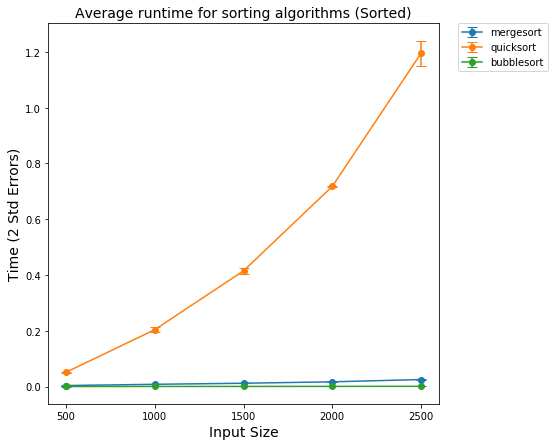

In [63]:
import functools
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

funcs = ["mergesort", "quicksort", "bubblesort"]
n_lst = [500, 1000, 1500, 2000, 2500]
reps = 20

# df will store means of each sorting method
df = pd.DataFrame(index = n_lst, columns = funcs)

# df_se will hold sample variances of each sorting method
df_se = pd.DataFrame(index = n_lst, columns = funcs)

# Compute runtimes over 20 trials
for n in n_lst:
    run20Times = []
    for _ in range(reps):
        # Sorted List
        run20Times.append(run_timing_expt(list(range(n))))

    # Calculate Sample Variance of each sorting methood
    df_se.loc[n] = [np.std([x[i] for x in run20Times]) for i in range(len(funcs))]

    # Calculate Mean
    df.loc[n] = [np.mean([x[i] for x in run20Times]) for i in range(len(funcs))]

# Compute the standard error for each method
df_se[funcs] = (df_se[funcs]).apply(np.float32)
error = (df_se[funcs] / np.sqrt(reps)) * 2
xpos = np.arange(len(n_lst))

# Create our plot
plt.rcParams['figure.figsize'] = [7, 7]
fig = plt.figure()
for func in funcs:
    plt.errorbar(xpos, df[func], yerr = error[func], capsize = 5, marker = "o")
plt.title('Average runtime for sorting algorithms (Sorted)', fontsize = 14)
plt.ylabel('Time (2 Std Errors)', fontsize = 14)
plt.xlabel('Input Size', fontsize = 14)
plt.legend(funcs, bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
_=plt.xticks(xpos, n_lst)
plt.rcParams['figure.figsize'] = [7, 7]

fig.savefig("ascending.pdf", bbox_inches='tight')

- *From the graph above, we see that `quicksort` has the longest running time on an already sorted list. This is because we chose our pivot to be the last element in the list.*

4. Run the same experiment, but this time with the input being a list sorted in *descending* order. That is, you should run twenty trials of 

`run_timing_expt(sorted(list(range(n)), reverse=True))`

for $n = 500, 1000, 1500, 2000, 2500$. Again make a plot summarizing the results and including an appropriate title and axis labels. Please include error bars in your plot indicating 2 standard errors of the mean. Save your plot as `descending.pdf` and include it in your submission.

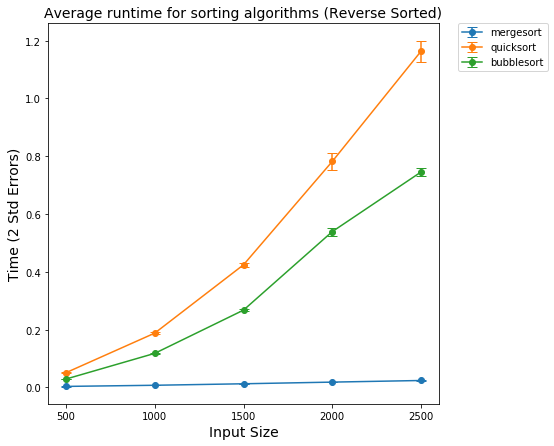

In [61]:
# df will store means of each sorting method
df = pd.DataFrame(index = n_lst, columns = funcs)

# df_se will hold sample variances of each sorting method
df_se = pd.DataFrame(index = n_lst, columns = funcs)

# Compute runtimes over 20 trials
for n in n_lst:
    run20Times = []
    for _ in range(reps):
        # Reverse Sorted List
        run20Times.append(run_timing_expt(sorted(list(range(n)), reverse=True)))

    # Calculate Sample Variance of each sorting methood
    df_se.loc[n] = [np.std([x[i] for x in run20Times]) for i in range(len(funcs))]

    # Calculate Mean
    df.loc[n] = [np.mean([x[i] for x in run20Times]) for i in range(len(funcs))]

# Compute the standard error for each method
df_se[funcs] = (df_se[funcs]).apply(np.float32)
error = (df_se[funcs] / np.sqrt(reps)) * 2
xpos = np.arange(len(n_lst))

# Create our plot
fig = plt.figure()
plt.rcParams['figure.figsize'] = [7, 7]
for func in funcs:
    plt.errorbar(xpos, df[func], yerr = error[func], capsize = 5, marker = "o")
plt.title('Average runtime for sorting algorithms (Reverse Sorted)', fontsize = 14)
plt.ylabel('Time (2 Std Errors)', fontsize = 14)
plt.xlabel('Input Size', fontsize = 14)
plt.legend(funcs, bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
_=plt.xticks(xpos, n_lst)
plt.rcParams['figure.figsize'] = [7, 7]

fig.savefig("descending.pdf", bbox_inches='tight')

5. Run the same experiment, but this time on random inputs. That is, for each value of $n$ in the previous subproblem, run $20$ independent trials of 

`run_timing_expt([random.random() for _ in range(n)])`

Again make a plot summarizing the results and including an appropriate title and axis labels. Please include error bars in your plot indicating $2$ standard errors of the mean. Save your plot as `random.pdf` and include it in your submission.

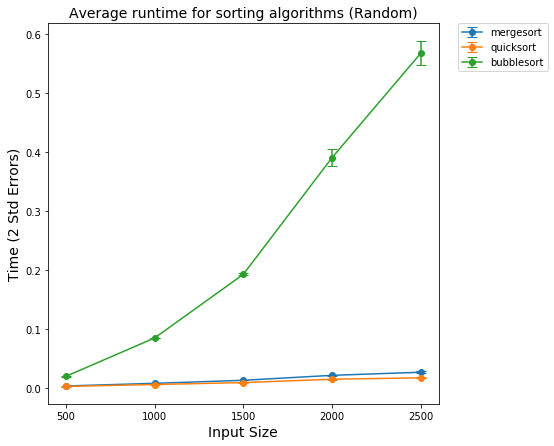

In [62]:
import numpy.random as random

# df will store means of each sorting method
df = pd.DataFrame(index = n_lst, columns = funcs)

# df_se will hold sample variances of each sorting method
df_se = pd.DataFrame(index = n_lst, columns = funcs)

# Compute runtimes over 20 trials
for n in n_lst:
    run20Times = []
    for _ in range(reps):
        # Random List
        run20Times.append(run_timing_expt([random.random() for _ in range(n)]))

    # Calculate Sample Variance of each sorting methood
    df_se.loc[n] = [np.std([x[i] for x in run20Times]) for i in range(len(funcs))]

    # Calculate Mean
    df.loc[n] = [np.mean([x[i] for x in run20Times]) for i in range(len(funcs))]

# Compute the standard error for each method
df_se[funcs] = (df_se[funcs]).apply(np.float32)
error = (df_se[funcs] / np.sqrt(reps)) * 2
xpos = np.arange(len(n_lst))

# Create our plot
fig = plt.figure()
plt.rcParams['figure.figsize'] = [7, 7]
for func in funcs:
    plt.errorbar(xpos, df[func], yerr = error[func], capsize = 5, marker = "o")
plt.title('Average runtime for sorting algorithms (Random)', fontsize = 14)
plt.ylabel('Time (2 Std Errors)', fontsize = 14)
plt.xlabel('Input Size', fontsize = 14)
plt.legend(funcs, bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
_=plt.xticks(xpos, n_lst)
plt.rcParams['figure.figsize'] = [7, 7]

fig.savefig("random.pdf", bbox_inches='tight')